# <center>QBUS2820 - Assignment 2 Task 1</center>

<center>Charles Christopher Hyland (450411920)</center>

<center>Cindy Ngo (460323734)</center>

<center>Matthew Youie (440211699)</center>

### Table of Contents:
1. [Importing Packages and Dataset](#import_pack)
2. [Business Understanding](#buss_und)
3. [Data Understanding](#data_und)
4. [Data Preparation](#data_prep)
5. [Modeling](#model)
6. [Evaluation](#eval)
7. [Deployment](#deploy)

<a class="anchor" id="import_pack"></a>
# Importing Packages and Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import model_selection
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.cross_validation import cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('Clothing_Store.csv')

In [3]:
# Encoding Valid Phone Number variable numerically
dummies = pd.get_dummies(data[['VALPHON']],  drop_first=True)
data = data.join(dummies)
del data['VALPHON']

In [4]:
pd.set_option('max_columns', len(data.columns))
data.describe().round(3)

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP,VALPHON_Y
count,2.174000e+04,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000
mean,9.955672e+12,48935.216,126.966,5.064,472.888,0.384,113.889,12.572,0.214,0.027,0.041,0.093,0.136,0.086,0.069,0.066,0.068,0.034,0.018,0.010,0.030,0.013,0.073,14.218,147.822,286.852,24.257,90.008,31.991,222.472,41.669,0.522,11.577,437.630,170.853,0.187,7.146,0.750,17.205,2.340,2116.290,0.042,4.673,1.194,17.277,37.889,80.240,15.107,0.131,0.166,0.860
std,5.195910e+08,24086.449,104.738,6.420,640.051,0.486,87.250,2.461,0.230,0.069,0.110,0.136,0.183,0.140,0.132,0.117,0.157,0.131,0.100,0.037,0.078,0.050,0.174,149.864,395.139,441.461,113.856,184.616,97.164,362.774,108.107,0.142,7.142,192.902,146.172,0.129,5.346,1.673,24.616,1.603,1806.105,0.200,3.547,1.829,24.543,28.150,78.730,12.214,0.557,0.372,0.347
min,9.955600e+12,0.000,1.000,1.000,0.990,0.000,0.490,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,3.000,0.000,0.000,0.000,0.000,0.050,0.090,0.000,0.000,0.000,0.000
25%,9.955616e+12,30339.000,35.000,1.000,135.605,0.000,60.990,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,78.000,0.000,0.000,0.000,0.000,0.000,0.460,5.000,287.000,67.000,0.090,3.000,0.000,5.000,1.000,337.000,0.000,1.000,0.000,0.000,18.410,24.958,5.000,0.000,0.000,1.000
50%,9.955628e+12,48335.000,98.000,3.000,263.490,0.000,92.070,11.000,0.160,0.000,0.000,0.050,0.040,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,147.600,0.000,0.000,0.000,108.000,0.000,0.550,12.000,447.000,124.000,0.180,6.000,0.000,9.000,2.000,1670.000,0.000,4.000,0.000,0.000,29.520,52.000,11.000,0.000,0.000,1.000
75%,9.955639e+12,66707.000,206.000,6.000,569.000,1.000,139.505,16.000,0.310,0.030,0.030,0.140,0.230,0.130,0.090,0.100,0.060,0.000,0.000,0.000,0.030,0.004,0.030,0.000,127.938,321.942,0.000,109.992,0.000,287.572,0.000,0.620,17.000,630.000,230.000,0.280,10.000,1.000,20.000,3.000,4176.000,0.000,8.000,2.000,30.000,50.000,107.000,22.000,0.090,0.000,1.000
max,9.964401e+12,99687.000,365.000,115.000,22511.490,1.000,1919.880,19.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,10642.720,11476.800,22511.490,4099.920,5562.460,2189.000,13224.070,2259.500,0.990,38.000,713.000,713.000,0.950,37.000,32.000,743.000,19.000,7504.000,1.000,11.000,11.000,100.000,200.000,364.000,50.000,40.920,1.000,1.000


<a class="anchor" id="buss_und"></a>
# Business Understanding

In [5]:
y = ['RESP']

drop = ['HHKEY', 'PC_CALC20']
# customer id, unknown variable

categorical = ['ZIP_CODE', 'CLUSTYPE']
# zip code, market cluster

discrete = ['REC', 'FRE', 'PROMOS', 'DAYS', 'CLASSES', 'COUPONS', 'STYLES', 'STORES', 'MAILED', 'RESPONDED', 'STORELOY']
# visits, purchase visits, promos on file, days on file,
# diff product classes purchased, coupons used by cust, diff styles purchased,
# stores cust has shopped in, promos mailed in last yr promos responded in last yr

binary = ['CC_CARD', 'VALPHON_Y', 'WEB']
# CC owned, valid phone number on file, shopped on web

continuous = ['MON', 'AVRG', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'FREDAYS', 'LTFREDAY',
              'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND', 'GMP', 'MARKDOWN', 'RESPONSERATE', 'HI',
              'PERCRET','PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS',
              'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 'PCOLLSPND']
# total spent, average spent per visit, three month, one month, six month, amt spent in same period last yr,
# days between purchases in last yr, days between purchases over lifetime
# amount spent at each franchise (x4)
# gross margin percentage, markdown percentage of customer purchases, 0-100% promotion response rate,
# product uniformity (low is spending diversity), percent of returns
# items x15

Predictors have been grouped by datatype above.

In [6]:
data.shape

(21740, 51)

There are 50 predictors (and 1 response) for 21740 customers.

In [7]:
print("Mean amount spent by customer %.2f"%data['AVRG'].mean())
print("Median amount spent by customer %.2f"%data['AVRG'].median())
print("Skewness of the amount spent by customer is %.2f"%data['AVRG'].skew())

Mean amount spent by customer 113.89
Median amount spent by customer 92.07
Skewness of the amount spent by customer is 3.51


Mean amount of money spent by typical customer is \$114 whilst median was \$92. Due to data being positively skewed (mean greater than median), we decide to take the average amount spent by a customer was \$92. We assume profit is 15% of this, so profit made for each successful customer who is sent mail and responds, is \$14

In [8]:
data['AVRG'].describe()

count    21740.000000
mean       113.889105
std         87.249794
min          0.490000
25%         60.990000
50%         92.070000
75%        139.505000
max       1919.880000
Name: AVRG, dtype: float64

<a class="anchor" id="data_und"></a>
# Data Understanding
**(Exploratory Data Analysis)**

In [9]:
# Missing data
missing_data = data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['Predictor', 'Count of NaN values']
missing_data['Missing Ratio'] = missing_data['Count of NaN values'] / data.shape[0]
missing_data.loc[missing_data['Missing Ratio'] > 0]

,Predictor,Count of NaN values,Missing Ratio


No missing data to worry about

In [10]:
# Percentage of Responces
data['RESP'].value_counts(normalize=True).round(3)*100

0    83.4
1    16.6
Name: RESP, dtype: float64

Issue here since in dataset, only 16.6% of observations actually responded to marketing campain. We have a massive class imbalance here. It will be difficult to obtain a good score for the sensitivity as a result.

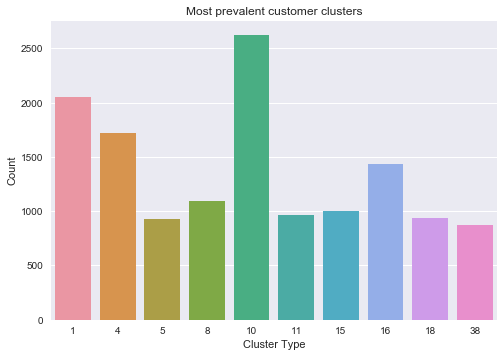

In [11]:
# Cluster variable which tells us what kind of customer (segment) they are from
clust_type_count = data['CLUSTYPE'].value_counts()
ax = sns.barplot(x =clust_type_count.index[:10], y= clust_type_count[:10])
ax.set(xlabel='Cluster Type', ylabel='Count', title="Most prevalent customer clusters")
plt.show()

Cluster 10 (home sweet home) is the most prevalent life style cluster in our data set (based on Microvision Market Segmentation System). These are families with medium-high income. Appears customer tends to be rich families that are hihgly educated.

In [12]:
# Testing for skewness in all features (aware that you can't test skewness in binary)
import scipy

columns = list(data.columns)

skewed = []
non_skewed = []

for i in columns:
    p = scipy.stats.skewtest(data[i], nan_policy='omit')[1] # calculates p_value (H0 = sample is from normally distributed pop)
    if p < 0.01:
        skewed.append(i)
    else:
        non_skewed.append(i)

non_skewed

['ZIP_CODE']

Looks like everything is skewed, since zip code doesn't count

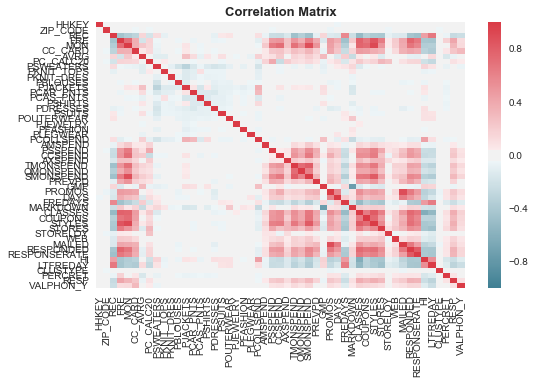

In [13]:
# Correlation matrix
fig, ax = plt.subplots()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), ax=ax, cmap=cmap)
ax.set_title('Correlation Matrix', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.show()

In [14]:
# Lists correlation pairs with absolute value of 0.75 or greater
columns = list(data.columns)
corr = pd.DataFrame(data.corr()) # Below requires correlation values in a table

high_corr = np.where(np.abs(corr) >= 0.75) # Chose 0.75 arbitrarily
high_corr = [(corr.columns[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

high_corr

[('FRE', 'CLASSES'),
 ('FRE', 'STYLES'),
 ('FRE', 'RESPONDED'),
 ('MON', 'SMONSPEND'),
 ('MON', 'CLASSES'),
 ('MON', 'STYLES'),
 ('TMONSPEND', 'SMONSPEND'),
 ('SMONSPEND', 'STYLES'),
 ('GMP', 'MARKDOWN'),
 ('PROMOS', 'MAILED'),
 ('CLASSES', 'STYLES'),
 ('RESPONDED', 'RESPONSERATE')]

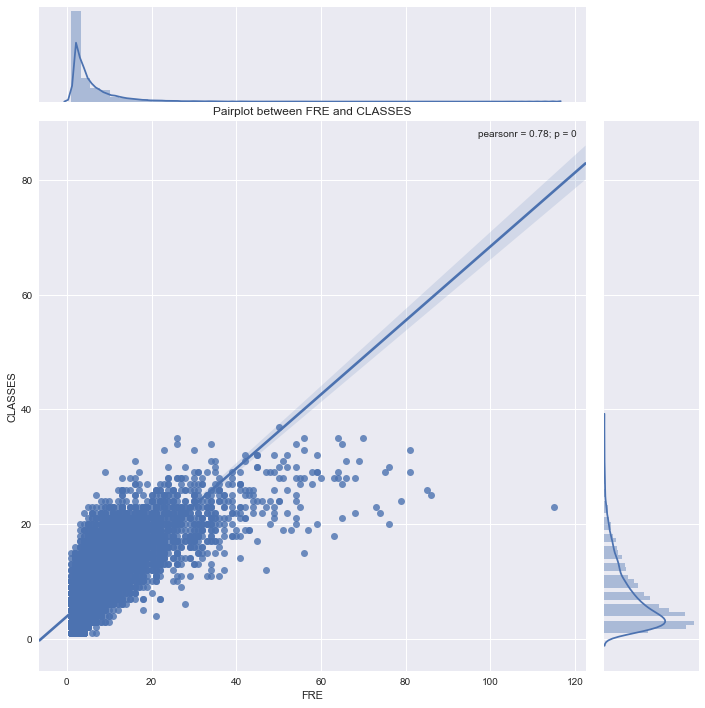

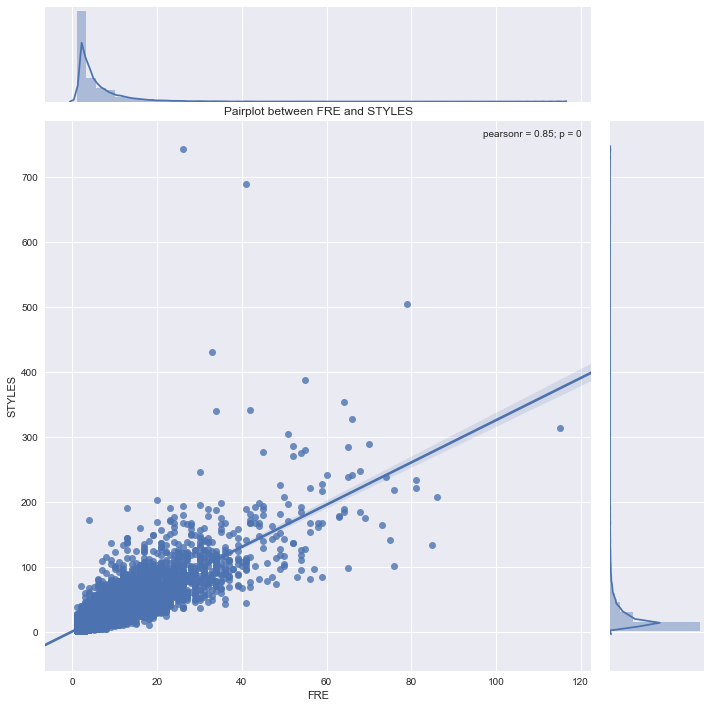

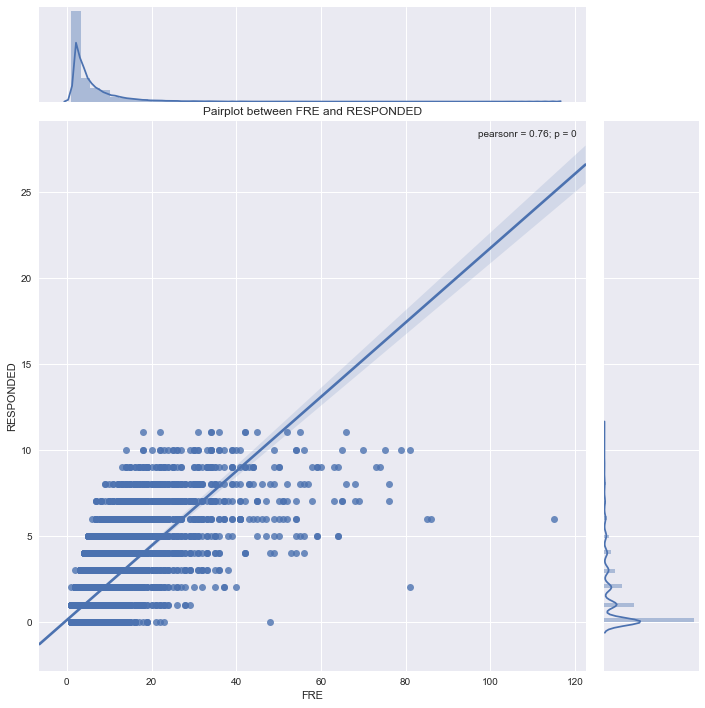

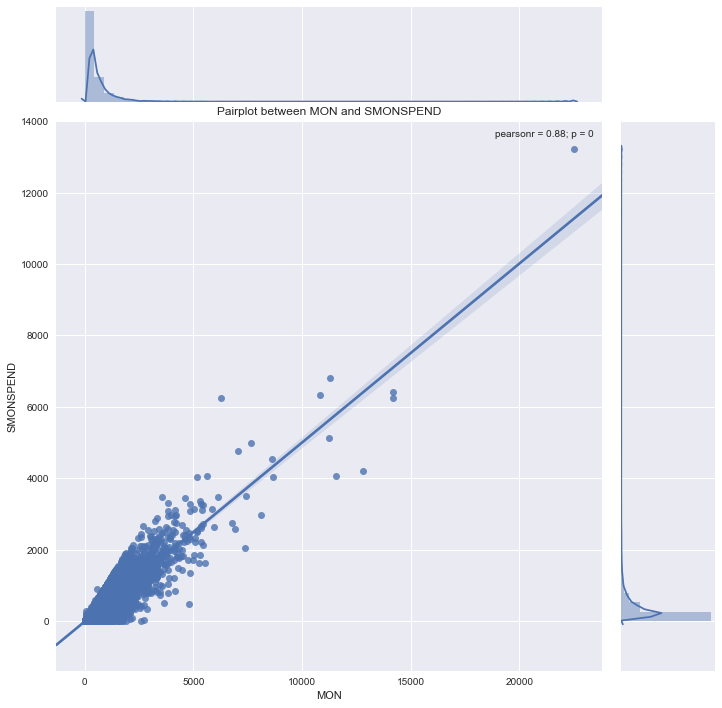

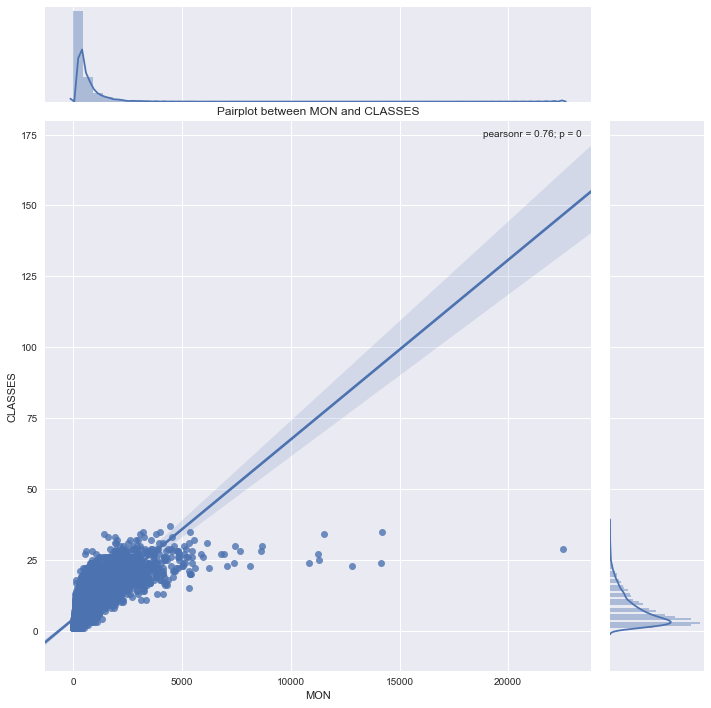

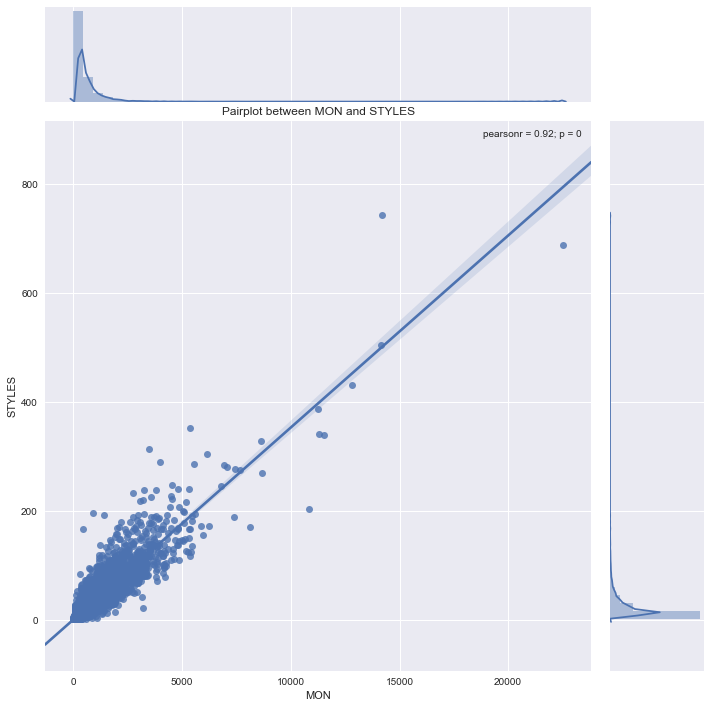

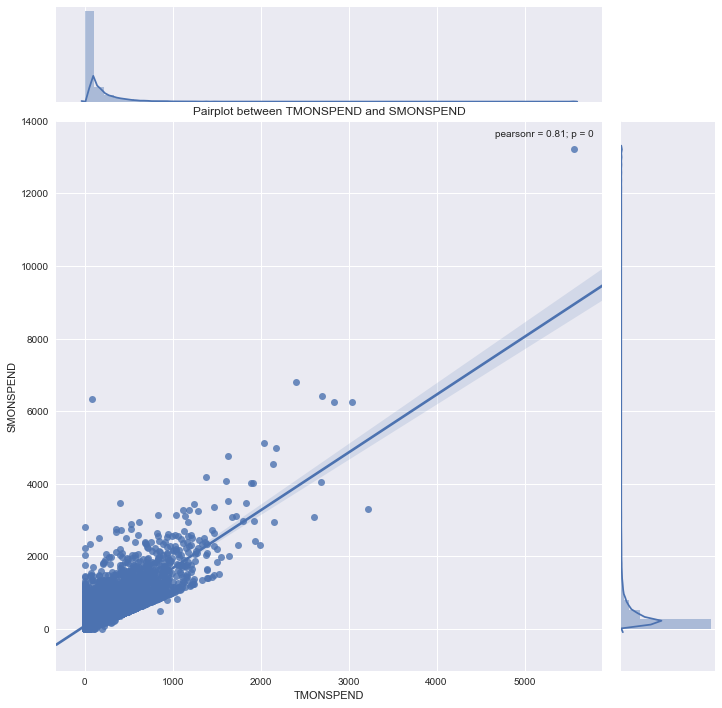

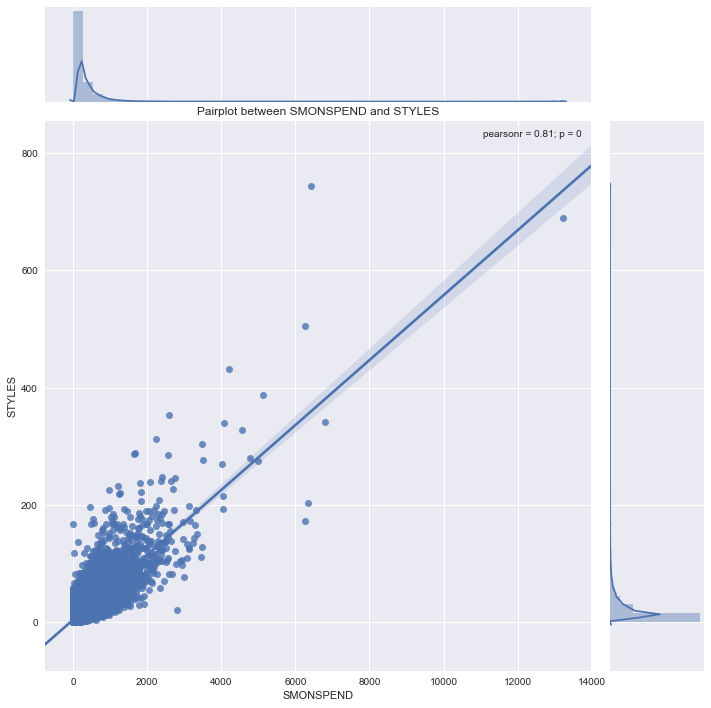

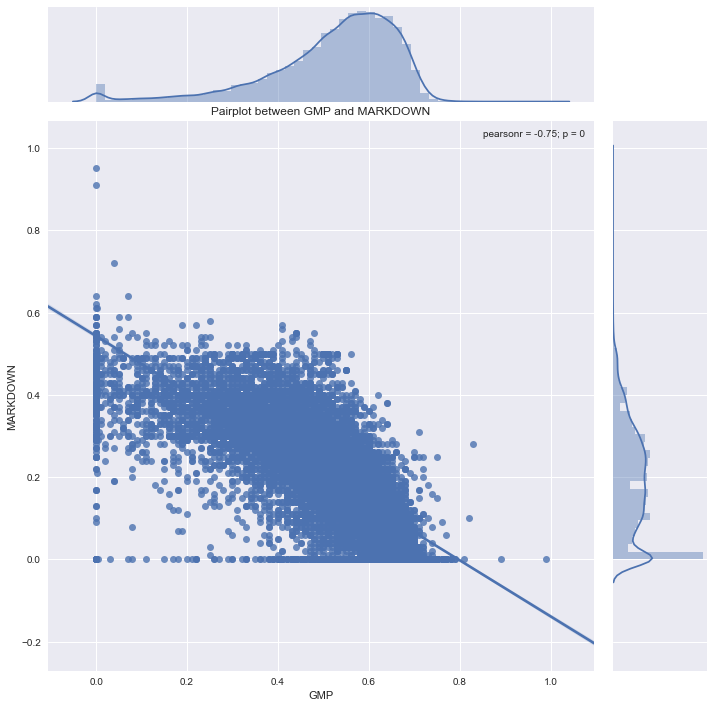

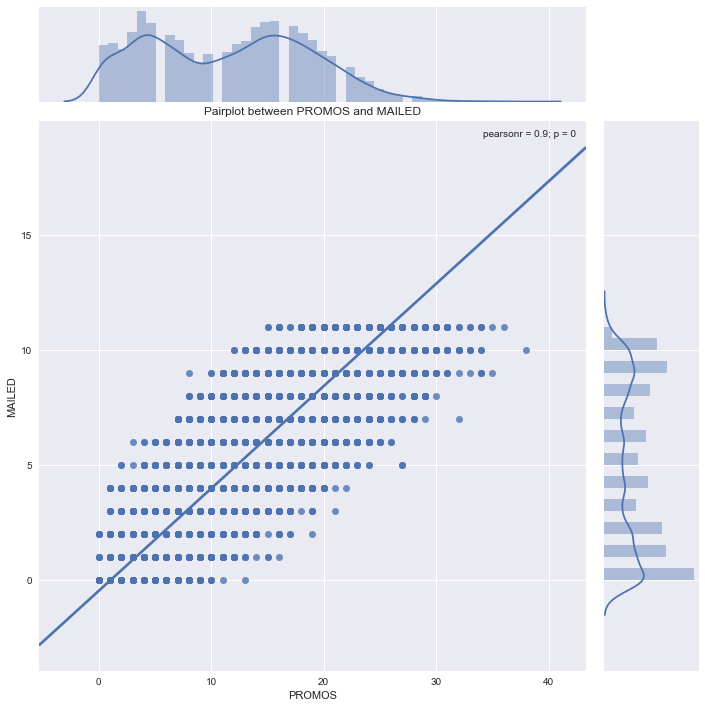

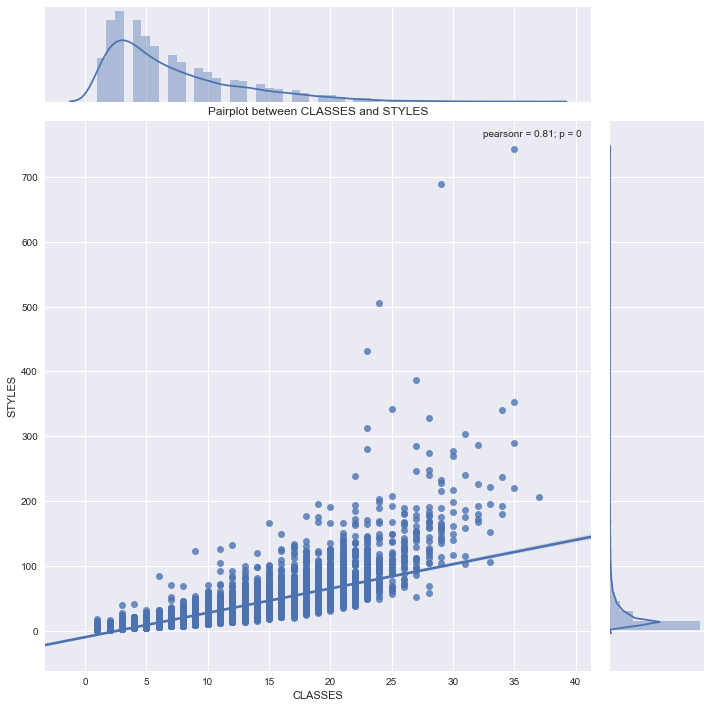

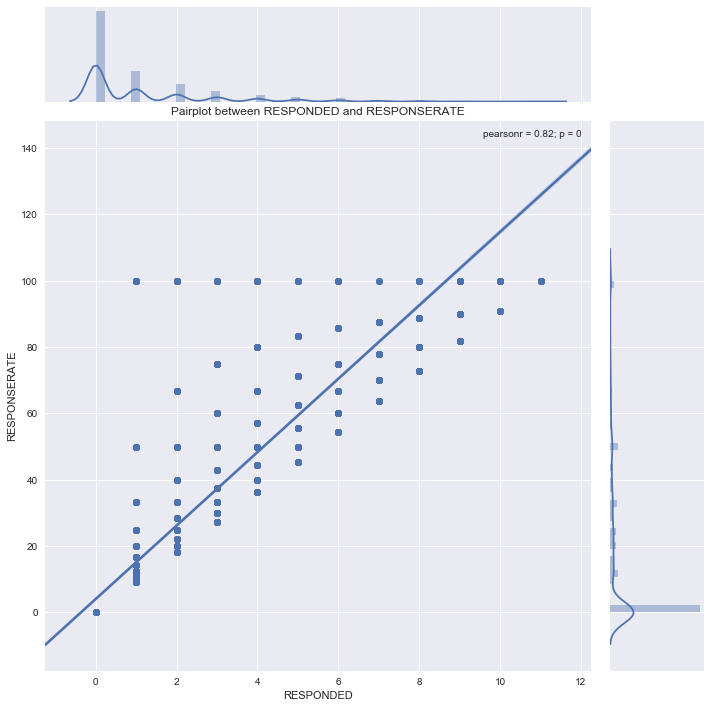

In [15]:
# Pairplots for high correlation pairs (based on above)
for i in high_corr:
    fig = sns.jointplot(x=data[i[0]], y=data[i[1]], kind='reg', size=10)
    plt.title('Pairplot between ' + str(i[0]) + ' and ' + str(i[1]))
    plt.show()

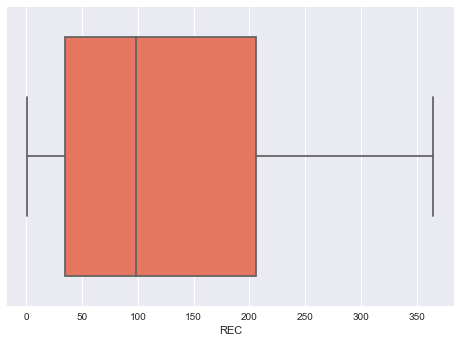

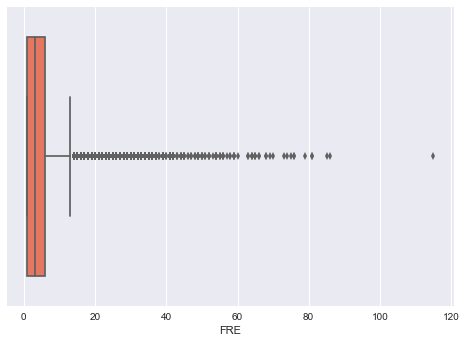

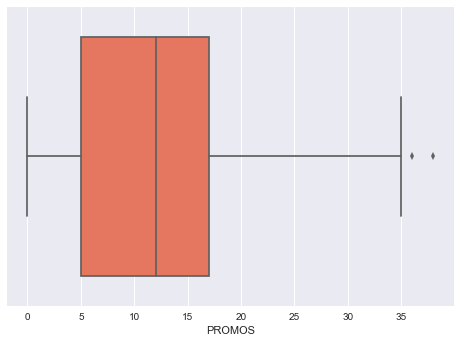

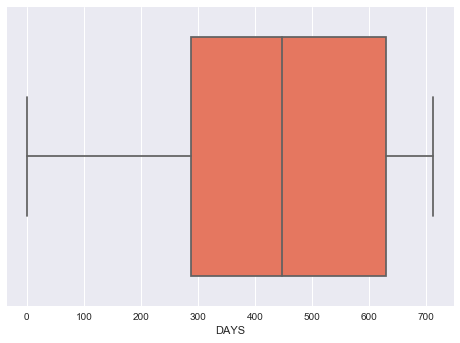

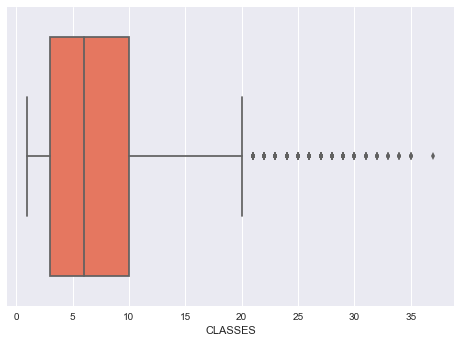

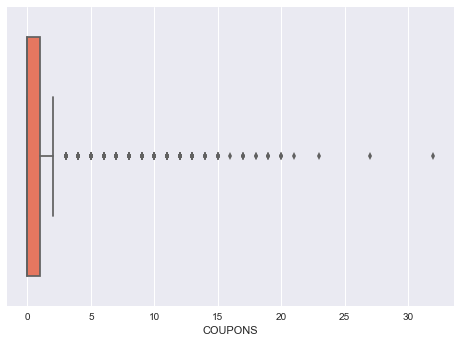

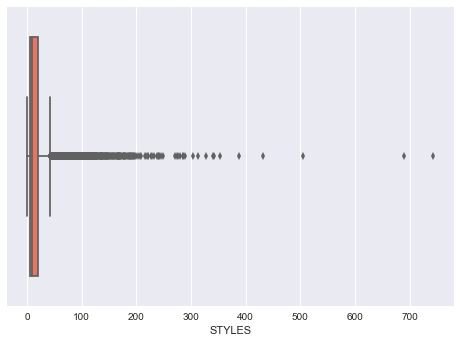

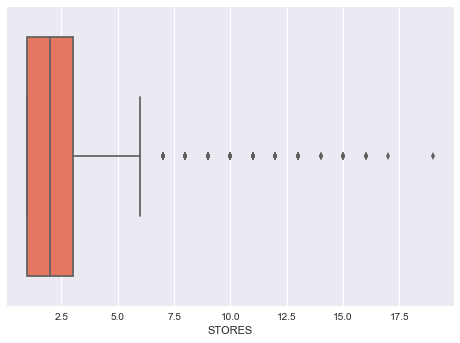

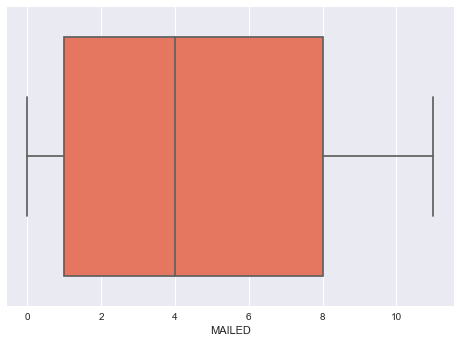

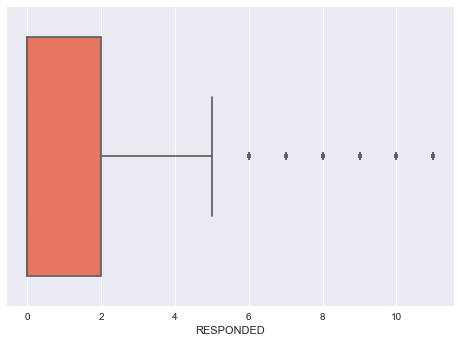

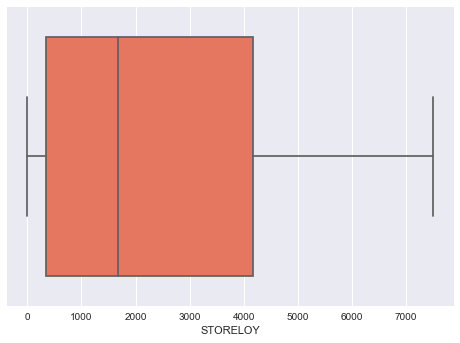

In [16]:
# Boxplot for discrete variables
for i in discrete: 
    fig, ax = plt.subplots()
    sns.boxplot(x=i, data=data, orient='h', palette='Reds')
    plt.show()

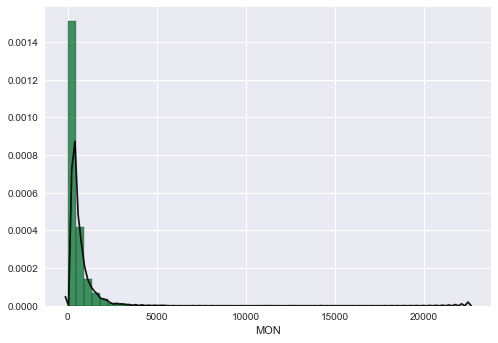

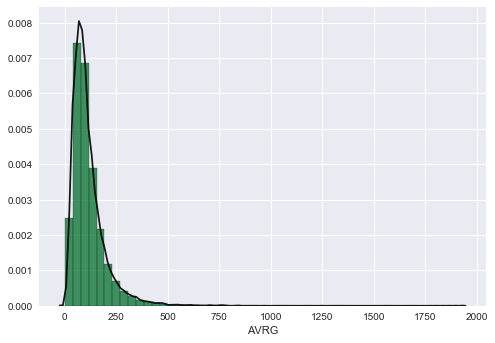

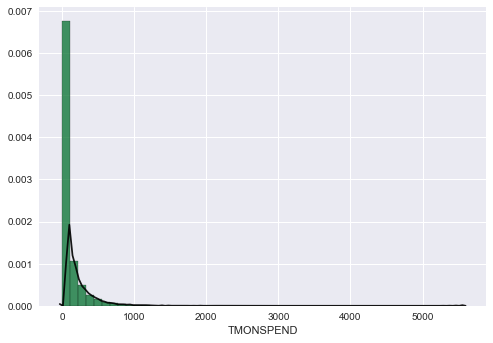

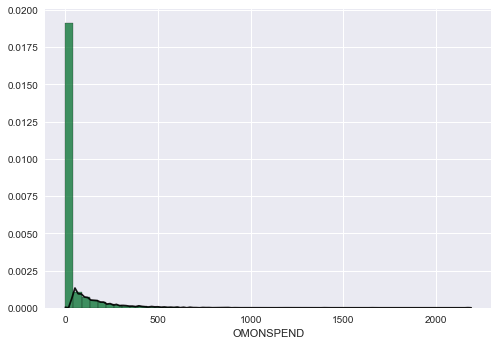

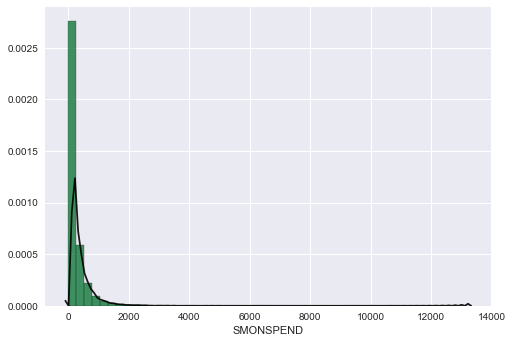

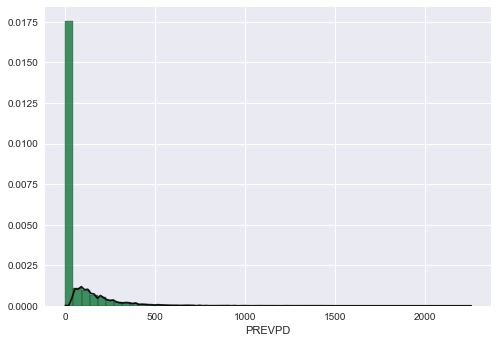

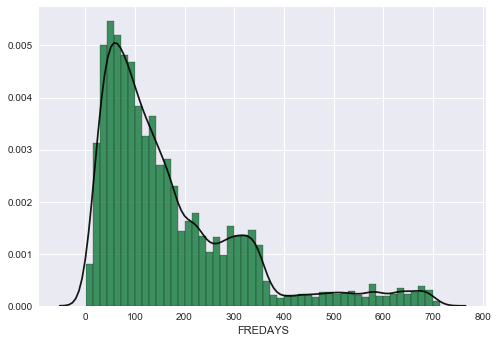

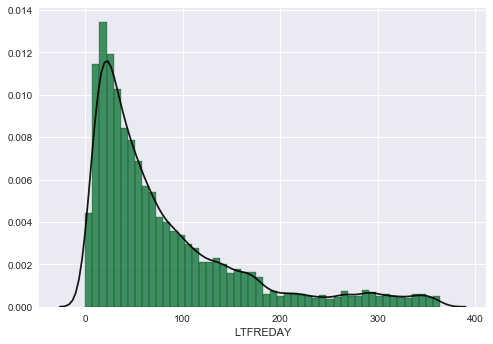

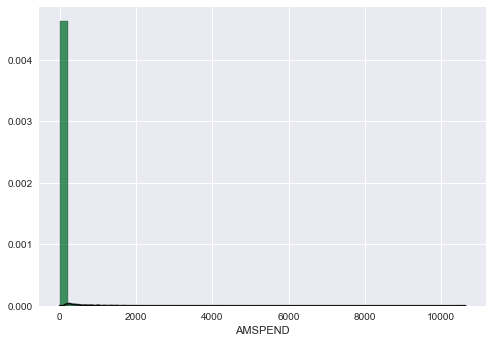

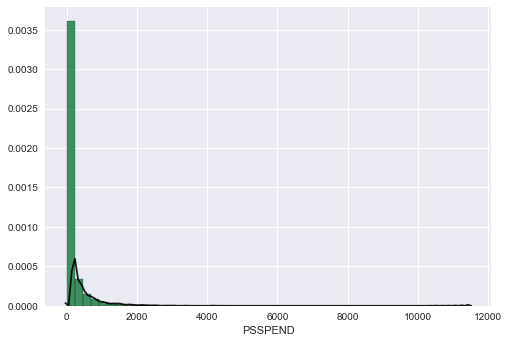

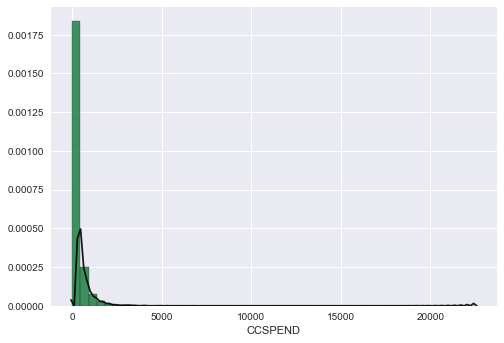

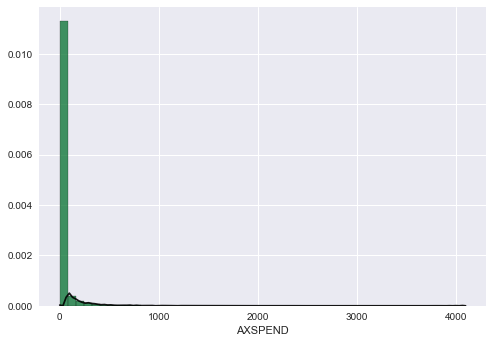

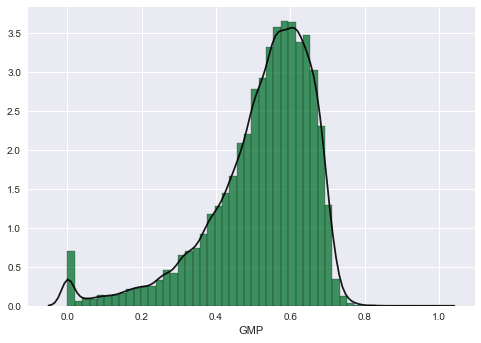

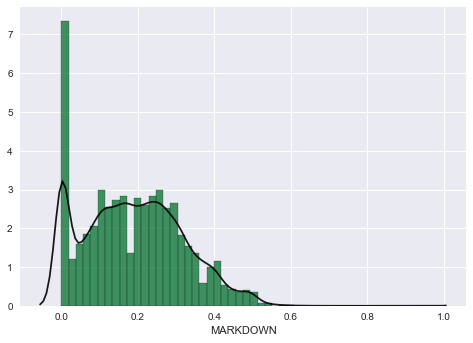

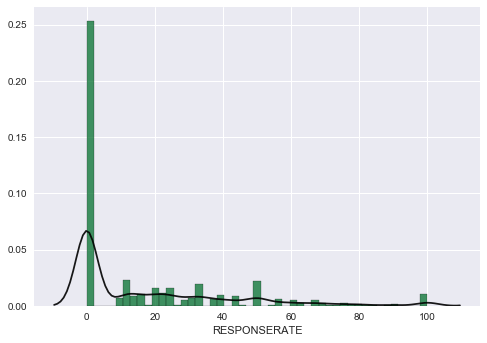

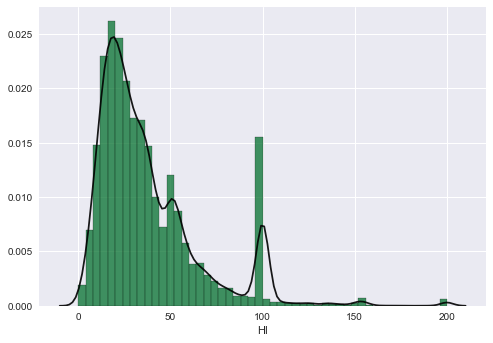

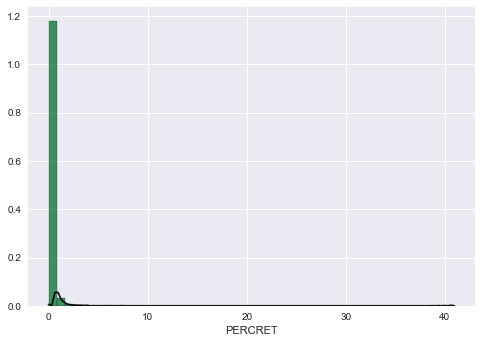

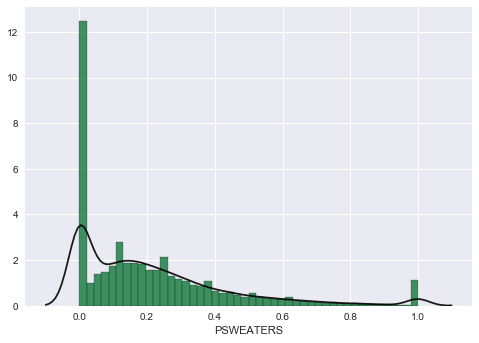

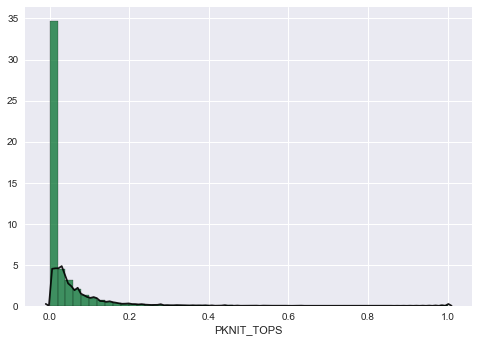

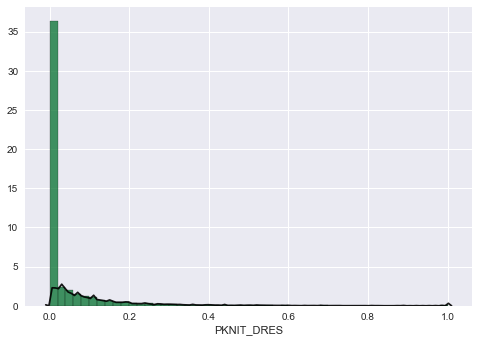

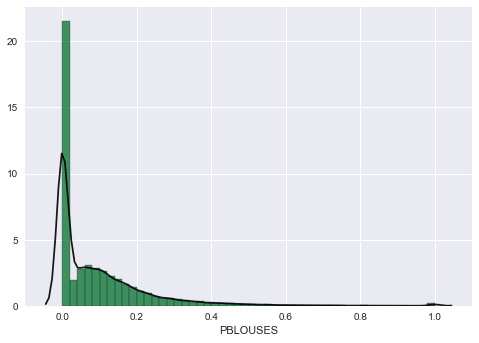

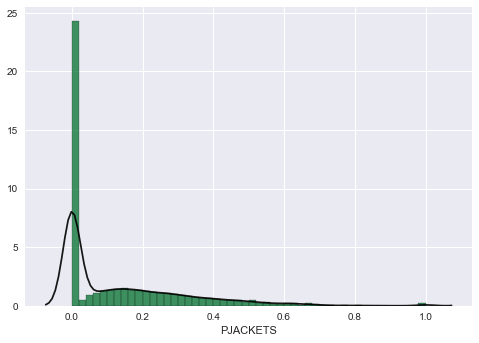

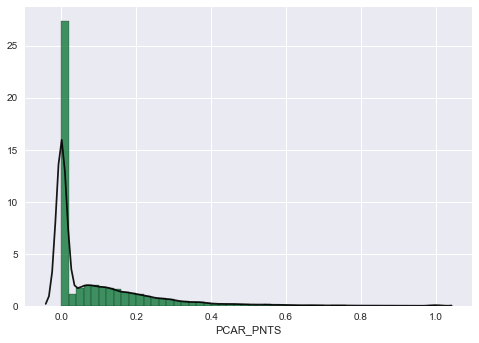

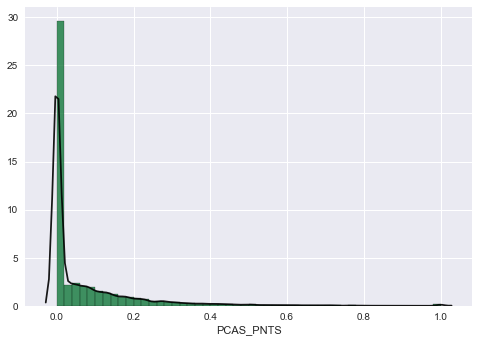

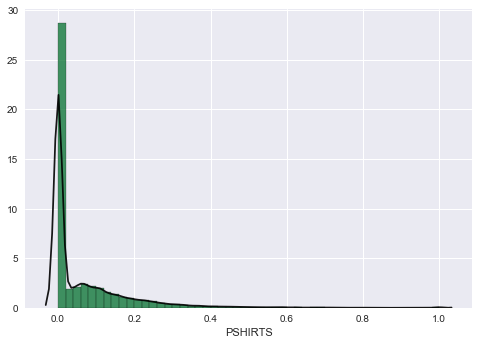

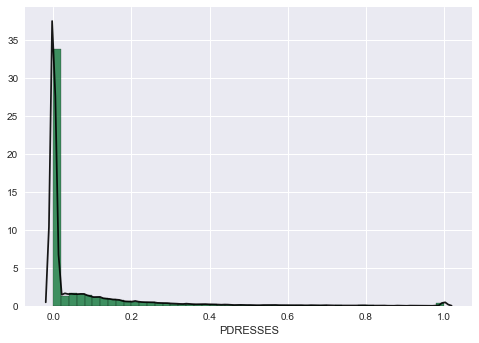

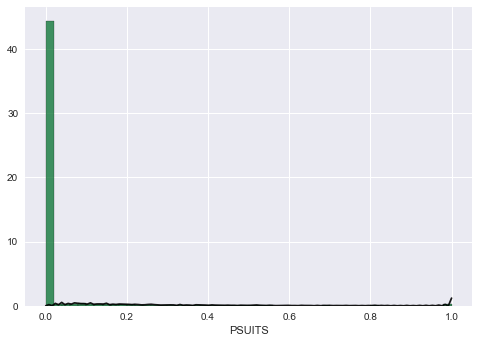

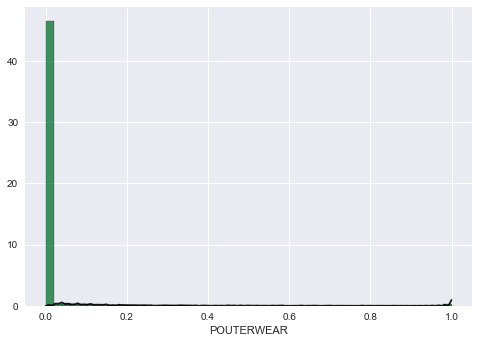

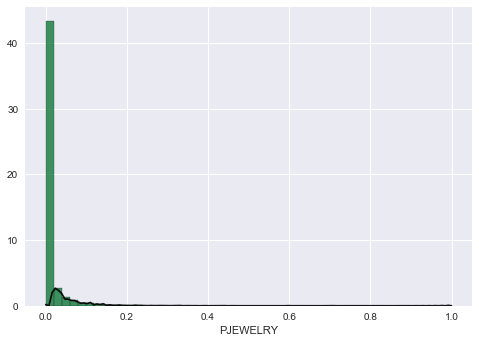

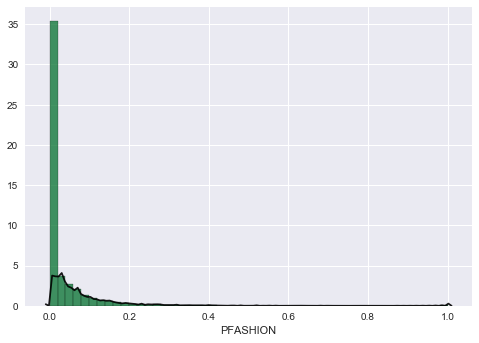

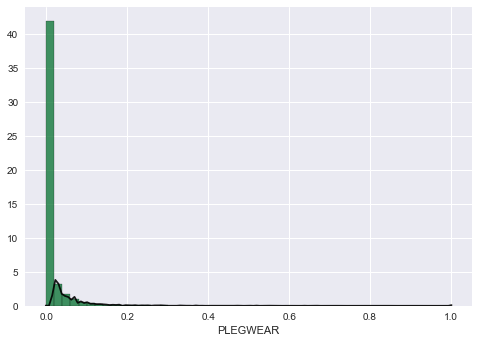

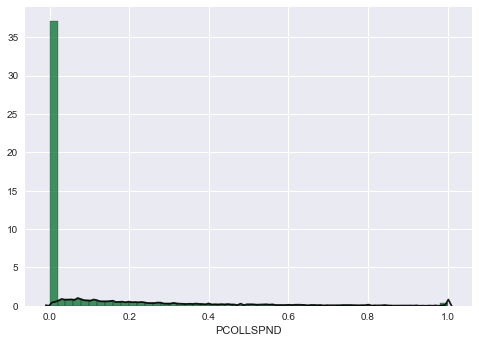

In [17]:
# Histogram for continuous variables
def hist(series):
    fig, ax = plt.subplots()
    sns.distplot(series, ax=ax,
                 hist_kws={'alpha': 0.75,
                           'edgecolor':'black',
                           'color': sns.color_palette('Greens')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.9})
    return plt.show()

for i in continuous:
    hist(data[i])

Several variables seem to have outliers - will need to be addressed

In [18]:
# Pivot table between cluster type and several features
pivot = pd.pivot_table(data, values=['FRE','DAYS','RESPONDED'], columns='CLUSTYPE')
pivot.round(3)

CLUSTYPE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
DAYS,419.143,450.339,451.590,445.973,448.295,441.656,438.805,437.306,441.675,458.207,446.103,436.917,425.479,412.925,420.468,435.187,437.782,389.260,435.463,405.778,443.275,406.087,453.094,428.074,437.203,444.786,433.615,432.429,424.467,405.859,418.861,473.150,413.437,485.333,408.382,415.493,432.548,406.478,424.025,447.908,402.005,421.202,402.405,404.419,426.00,398.218,445.695,410.24,421.32,400.250,429.452
FRE,4.857,5.144,5.888,5.242,5.099,5.339,4.700,4.553,4.933,3.862,5.319,5.037,4.576,5.088,4.064,5.420,4.919,4.745,5.306,7.444,4.612,4.609,5.112,5.089,4.735,5.276,4.154,5.857,4.389,3.766,4.322,4.300,5.346,4.333,4.091,5.458,6.161,4.507,4.808,5.956,4.422,4.828,4.091,3.710,1.25,4.750,5.298,2.52,3.92,2.812,5.195
RESPONDED,1.029,1.254,1.478,1.269,1.286,1.246,1.142,1.041,1.159,1.103,1.313,1.229,1.042,1.088,0.737,1.198,1.187,1.000,1.274,1.444,1.092,0.739,1.133,1.261,0.986,1.196,0.846,1.095,0.977,0.781,0.957,1.075,1.078,1.667,1.000,1.206,1.161,0.970,1.041,1.480,0.843,1.141,0.950,0.677,0.00,1.016,1.156,0.52,0.96,0.375,1.175


In [19]:
# Cross table between response and whether customer rsponded to mailing previously
crosstab = pd.crosstab(data['RESP'],data['RESPONDED'])
crosstab

RESPONDED,0,1,2,3,4,5,6,7,8,9,10,11
RESP,,,,,,,,,,,,
0,10816,3300,1754,925,560,373,204,96,58,29,12,2
1,894,613,518,455,345,262,200,139,92,55,28,10


In [20]:
# Proportions for table above
crosstab = (crosstab/crosstab.sum()).round(3)
crosstab

RESPONDED,0,1,2,3,4,5,6,7,8,9,10,11
RESP,,,,,,,,,,,,
0,0.924,0.843,0.772,0.67,0.619,0.587,0.505,0.409,0.387,0.345,0.3,0.167
1,0.076,0.157,0.228,0.33,0.381,0.413,0.495,0.591,0.613,0.655,0.7,0.833


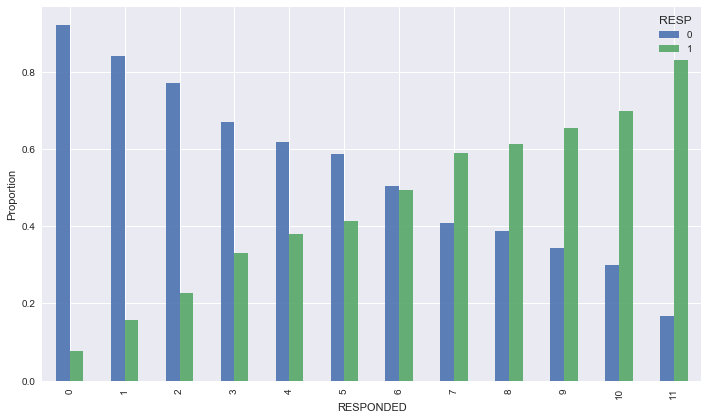

In [21]:
# Table based on above
fig, ax = plt.subplots(figsize=(10,6))
(crosstab.T).plot(kind='bar', alpha=0.9, ax=ax)
ax.set_xlabel('RESPONDED')
ax.set_ylabel('Proportion')
ax.legend_.set_title('RESP')
plt.tight_layout()
sns.despine()
plt.show()

In [22]:
data['ZIP_CODE'].value_counts().head()

55125    51
15601    42
62301    38
60089    38
60187    36
Name: ZIP_CODE, dtype: int64

Looks like zip code can be dropped. Way too many clusters with nothing really possible for encoding, except binning. If geographical information was available based on zip codes though, that could help.

In [23]:
data['CLUSTYPE'].value_counts().head(10)

10    2623
1     2054
4     1719
16    1431
8     1094
15    1002
11     964
18     938
5      931
38     873
Name: CLUSTYPE, dtype: int64

Top 10 cluster types make up high proportion. Can consider encoding first 9, and 10th and beyond all together as Other.

**EDA Tests:**

In [24]:
from scipy import stats

# Non-parametric Kruskal-Wallis ANOVA rank test - discrete variables
H = []
p = []

for i in discrete:
    h, pval = stats.kruskal(*[data.loc[data[i]==v,'RESP'] for v in data[i].unique()])
    H.append(h)
    p.append(pval)

# Calculates significance at 1% and appends results
test_results = []
for value in p:
    if value < 0.01:
        test_results.append('True')
    else:
        test_results.append('False')

# Creates tables with the values above
table = pd.DataFrame(H, columns = ['H Stat'], index = discrete)
table['p values'] = pd.DataFrame(p, index = discrete)
table['Reject, \u03b1=0.01'] = pd.DataFrame(test_results, index = discrete)

table.round(2)

,H Stat,p values,"Reject, α=0.01"
REC,2202.13,0.0,True
FRE,4096.08,0.0,True
PROMOS,1313.31,0.0,True
DAYS,1600.12,0.0,True
CLASSES,3077.12,0.0,True
COUPONS,2395.66,0.0,True
STYLES,3820.81,0.0,True
STORES,2042.75,0.0,True
MAILED,1093.56,0.0,True
RESPONDED,2698.85,0.0,True


In [25]:
# Same test as above, for binary and categorical variables
H = []
p = []

for i in binary:
    h, pval = stats.kruskal(*[data.loc[data[i]==v,'RESP'] for v in data[i].unique()])
    H.append(h)
    p.append(pval)

test_results = []
for value in p:
    if value < 0.01:
        test_results.append('True')
    else:
        test_results.append('False')

table = pd.DataFrame(H, columns = ['H Stat'], index = binary)
table['p values'] = pd.DataFrame(p, index = binary)
table['Reject, \u03b1=0.01'] = pd.DataFrame(test_results, index = binary)

table.round(2)

,H Stat,p values,"Reject, α=0.01"
CC_CARD,1265.24,0.0,True
VALPHON_Y,236.33,0.0,True
WEB,555.28,0.0,True


There is significant evidence to reject H0 that medians are different for these variables in determining response

In [26]:
# Variance Inflation Factor calculations for multicollinearity - excluding binary (bc it doesn't work)
from statsmodels.stats.outliers_influence import variance_inflation_factor

pred = discrete + continuous

X = data[pred].as_matrix()
VIF = pd.DataFrame([np.sqrt(variance_inflation_factor(X,j)) for j in range(len(pred))], index=pred, columns=['SQRT(VIF)'])

VIF.sort_values(by='SQRT(VIF)', ascending=False).round(2).head(10)

,SQRT(VIF)
MON,167.34
CCSPEND,110.65
PSSPEND,88.71
AMSPEND,31.66
AXSPEND,24.49
GMP,5.05
STYLES,4.89
PROMOS,4.71
MAILED,4.37
DAYS,4.28


Multicollinearity for top 5 - needs to be addressed

<a class="anchor" id="data_prep"></a>
# Data Preparation
**(Feature Engineering)**

### Transformations

In [27]:
data['LOG_MON'] = np.log(data['MON'])
data['POWER_MON'] = scipy.stats.boxcox(data['MON'])[0]

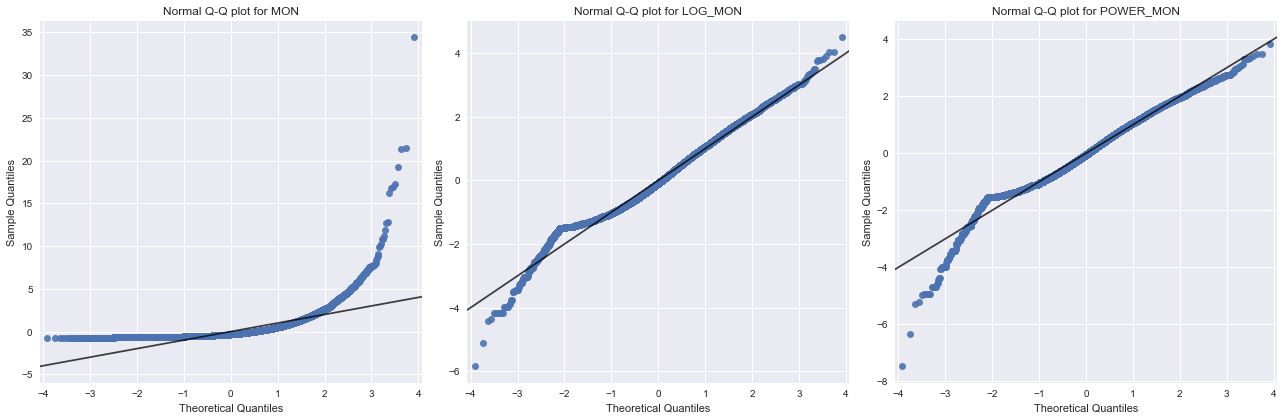

In [28]:
import warnings
warnings.filterwarnings('ignore')

# Comparison of the original and two transformed series on Q-Q plot
import statsmodels.api as sm

label = ['MON', 'LOG_MON', 'POWER_MON']

fig, ax = plt.subplots(1,3, figsize=(18,6))
i=0
for series in label:
    pp = sm.ProbPlot(data[series], fit=True)
    qq = pp.qqplot(color=sns.color_palette()[0], alpha=0.9, ax=ax[i])
    a = ax[i].get_xlim()[0]
    b = ax[i].get_xlim()[1]
    ax[i].plot([a,b],[a,b], color='black', alpha=0.75)
    ax[i].set_xlim(a,b)
    ax[i].set_title('Normal Q-Q plot for {}'.format(series))
    i+=1

plt.tight_layout()
plt.show()

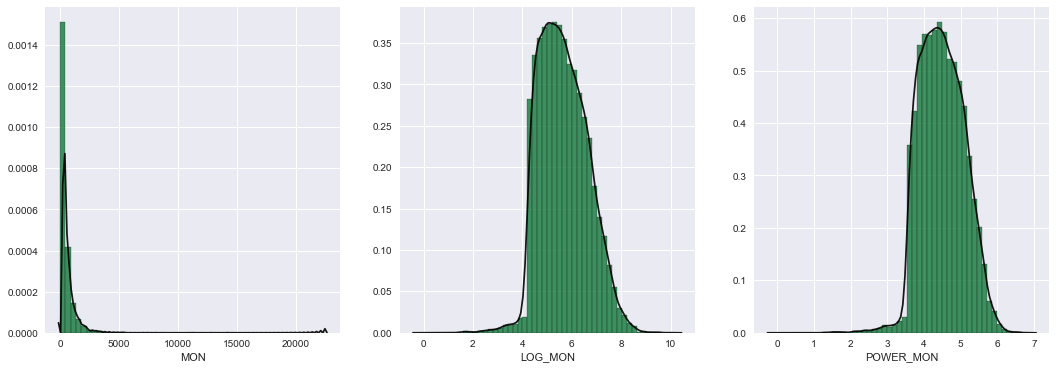

In [29]:
# Comparison of the original and two transformed series
label = ['MON', 'LOG_MON', 'POWER_MON']

fig, ax = plt.subplots(1,3, figsize=(18,6))
i=0
for series in label:
    sns.distplot(data[series], ax=ax[i],
             hist_kws={'alpha': 0.75, 'edgecolor':'black', 'color': sns.color_palette('Greens')[-1]},
                 kde_kws={'color': 'black', 'alpha': 0.9})
    i+=1

plt.show()

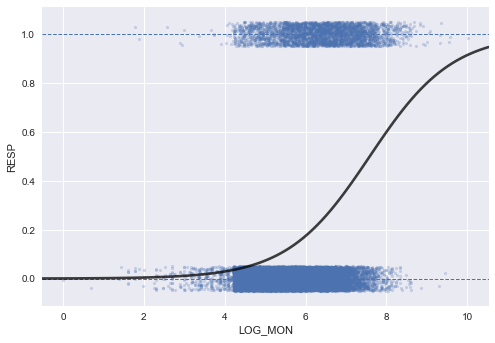

In [30]:
# Plotting the transformed money spent against response with Logit
fig, ax = plt.subplots()

ax.axhline(0.0, linestyle='--', linewidth=1)
ax.axhline(1.0, linestyle='--', linewidth=1)

sns.regplot(data['LOG_MON'], data['RESP'], ax=ax, ci=None, logistic=True, y_jitter=0.05, 
            scatter_kws={'s': 10, 'alpha': 0.25}, line_kws={'alpha': 0.75, 'color': 'black'})

ax.set_xlabel('LOG_MON')
ax.set_ylabel('RESP')

plt.show()

After assessing the benefits of log transforming the 'MON' variable, all other strictly positive continuous variables will be log-transformed too.

In [31]:
logged_predictors = []
neg_val_predictors = []
for i in continuous:
    if len(data[data[i] <= 0]) == 0:
        data[str('LOG_')+i] = np.log(data[i])
        logged_predictors.append(str(i))
    else:
        neg_val_predictors.append(str(i))

In [32]:
logged_predictors

['MON', 'AVRG', 'FREDAYS', 'LTFREDAY', 'CCSPEND', 'HI']

In [33]:
neg_val_predictors

['TMONSPEND',
 'OMONSPEND',
 'SMONSPEND',
 'PREVPD',
 'AMSPEND',
 'PSSPEND',
 'AXSPEND',
 'GMP',
 'MARKDOWN',
 'RESPONSERATE',
 'PERCRET',
 'PSWEATERS',
 'PKNIT_TOPS',
 'PKNIT_DRES',
 'PBLOUSES',
 'PJACKETS',
 'PCAR_PNTS',
 'PCAS_PNTS',
 'PSHIRTS',
 'PDRESSES',
 'PSUITS',
 'POUTERWEAR',
 'PJEWELRY',
 'PFASHION',
 'PLEGWEAR',
 'PCOLLSPND']

The above all had negative or 0 values and therefore cannot be logged

### Categorical encoding

In [34]:
# Combining clustype
data.loc[data['CLUSTYPE'] == 10, 'CLUSTYPE'] = 'Ten'
data.loc[data['CLUSTYPE'] == 1, 'CLUSTYPE'] = 'One'
data.loc[data['CLUSTYPE'] == 4, 'CLUSTYPE'] = 'Four'
data.loc[data['CLUSTYPE'] == 16, 'CLUSTYPE'] = 'Sixteen'
data.loc[data['CLUSTYPE'] == 8, 'CLUSTYPE'] = 'Eight'
data.loc[data['CLUSTYPE'] == 15, 'CLUSTYPE'] = 'Fifteen'
data.loc[data['CLUSTYPE'] == 11, 'CLUSTYPE'] = 'Eleven'
data.loc[data['CLUSTYPE'] == 18, 'CLUSTYPE'] = 'Eighteen'
data.loc[data['CLUSTYPE'] == 5, 'CLUSTYPE'] = 'Five'

# Chosen from top 9 most frequent cluster types, remainder will be combined into Other

clus = [10, 1, 4, 16, 8, 15, 11, 18, 5]
for i in range(0,51):
    if i not in clus:
        data.loc[data['CLUSTYPE'] == i, 'CLUSTYPE'] = 'Other'

In [35]:
dummies = pd.get_dummies(data[['CLUSTYPE']], drop_first=True)
data = data.join(dummies)
del data['CLUSTYPE']

### Interactions

In [36]:
# Creating interactions
data['I1'] = data['CC_CARD'] * data['MON'] # credit card owned : spent
data['I2'] = data['WEB'] * data['MON'] # web shopper : spent
# VALPHON not used due to ANOVA test suggesting no difference in class medians

data['I3'] = data['PROMOS'] * data['MON'] # promos used : spent
data['I4'] = data['CLASSES'] * data['MON'] # classes purchased : spent
data['I5'] = data['COUPONS'] * data['MON'] # coupons used : spent
data['I6'] = data['RESPONDED'] * data['MON'] # mail promo responses : spent

data['I7'] = data['MAILED'] * data['FREDAYS'] # mailed : frequency between visits

# could also consider 'TMONSPEND', 'OMONSPEND', 'SMONSPEND'

These interactions were chosen on the basis of:
* *Binary variables CC_CARD and WEB potentially changing how much money you would spend in store*
* *Number of promos (discrete) on file and amount spent*
* *rational for differnet classes purchased and amount spent = more diverse spending maybe? so more money spent*
* *Number of coupons (discrete) used and amount spent*
* *Number of mail promos responded to (discrete) and amount spent*

### Dropping predictors

In [37]:
response = ['RESP']
drop = ['HHKEY', 'PC_CALC20', 'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND', 'ZIP_CODE']
# dropped the customer id and pc_calc (unknown), as well as spend variables due to multicollinearity
# zip_code dropped following EDA - way too many classes (could bin it potentially though if more geographic info was available)

exclude = response + drop + logged_predictors + ['POWER_MON']

predictors = [x for x in list(data.columns) if x not in exclude]

### Scaling

In [38]:
# Scaling all variables (could consider robust scaling, but won't bother due to past experience in performance deterioration)
# Should just apply to the continuous... but following Marcel's Tutorial 5 notebook
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data[predictors])
data_scale = scaler.transform(data[predictors])
data_scale = pd.DataFrame(data_scale, columns=predictors)

### Final Dataset

In [39]:
data = data[['RESP']].join(data_scale)
data.head()

,RESP,REC,FRE,CC_CARD,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,...,RESPONSERATE,PERCRET,VALPHON_Y,LOG_MON,LOG_AVRG,LOG_FREDAYS,LOG_LTFREDAY,LOG_CCSPEND,LOG_HI,CLUSTYPE_Eighteen,CLUSTYPE_Eleven,CLUSTYPE_Fifteen,CLUSTYPE_Five,CLUSTYPE_Four,CLUSTYPE_One,CLUSTYPE_Other,CLUSTYPE_Sixteen,CLUSTYPE_Ten,I1,I2,I3,I4,I5,I6,I7
0,0,0.773700,-0.477282,-0.789146,-0.146231,-0.395695,-0.375769,1.513790,-0.741588,1.170639,-0.523220,1.058601,-0.435927,-0.260588,-0.184123,-0.264446,-0.125124,0.349508,1.247541,-0.487554,-0.329251,-0.613265,-0.385449,0.548049,0.759250,...,-0.703948,-0.234545,-2.474038,0.258852,1.049563,1.165998,0.773957,0.758324,0.100986,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,-0.839223,-0.265446,2.699670,-0.451234,-0.140699,-0.079255,-0.176712,-0.099736,-0.295648,0.912394
1,1,-1.154972,-0.165762,1.267193,0.201265,1.935082,-0.375769,-0.685228,-0.741588,0.670965,0.534007,-0.567190,0.711379,-0.260588,-0.184123,-0.264446,-0.380808,0.147894,1.706758,0.259961,0.247006,0.097937,-0.385449,0.126944,0.339212,...,1.333331,-0.180661,0.404197,-0.108551,-0.523216,0.420930,-0.146357,0.458271,0.139894,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,-0.839223,-0.265446,2.699670,-0.053597,-0.140699,-0.249544,-0.294297,-0.147524,-0.183381,-0.069074
2,0,1.909897,-0.477282,-0.789146,3.415599,-0.395695,-0.375769,-0.685228,-0.741588,-0.613911,-0.523220,-0.567190,-0.435927,-0.260588,-0.184123,-0.264446,-0.380808,-0.255333,-0.417120,-0.487554,-0.329251,-0.613265,-0.024686,0.688417,-0.220839,...,-0.703948,-0.234545,-2.474038,-1.355128,-1.296488,0.404318,0.301173,-0.559792,1.680988,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,-0.839223,3.767250,-0.370416,-0.451234,-0.140699,-0.432046,-0.392121,-0.147524,-0.295648,-0.079202
3,0,-0.582099,0.457278,1.267193,0.722508,-0.395695,0.079211,-0.245424,0.352398,0.599583,-0.523220,-0.139350,-0.435927,-0.260588,-0.184123,-0.120514,0.002718,-0.053720,-0.417120,0.080882,-0.329251,0.417344,1.152421,-0.645080,1.739338,...,2.012559,-0.234545,0.404197,1.115837,0.217696,-0.366562,-0.616360,1.458213,-0.330251,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,-0.839223,-0.265446,2.699670,0.852737,-0.140699,0.822439,0.446725,0.181672,0.808832,0.024697
4,0,-0.744413,-0.633042,-0.789146,-0.059357,2.517776,-0.375769,-0.685228,-0.741588,-0.613911,2.572946,-0.567190,-0.435927,-0.260588,-0.184123,4.346165,-0.380808,-0.255333,-0.417120,-0.013911,-0.329251,-0.372228,-0.385449,-2.118946,-1.620965,...,-0.703948,-0.234545,0.404197,-1.224045,-0.067219,-1.033692,-0.710361,-0.452739,-0.049615,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,1.191578,-0.265446,-0.370416,-0.451234,-0.140699,-0.481492,-0.373982,-0.147524,-0.295648,-0.774029


<a class="anchor" id="model"></a>
# Modelling

## Benchmark / Baseline Model
Assumption: store sends marketing letter to every customer and expects a response

In [40]:
resp_y = len(data[data['RESP'] == 1]) # count for responses
resp_n = len(data[data['RESP'] == 0]) # count for no responses
resp_total = len(data['RESP'])

In [41]:
print('Customers who respond: {}'.format(resp_y))
print('Customers who do not respond: {}'.format(resp_n))
print('Percentage of customers who respond is: {}%'.format(round(resp_y/resp_total*100, 3)))

Customers who respond: 3611
Customers who do not respond: 18129
Percentage of customers who respond is: 16.61%


Computing cost/profit from sending marketing letter to every customer.

Given: 3611 true positives, and 18129 false positives

Assumptions:
* Profit for TP: $11.50

* Cost for FP: $2.50

* Lost profit for FN: $14.00

In [42]:
print('Profit from true positive is: ${}'.format(resp_y*11.5))
print('Cost from false positive is: ${}'.format(resp_n*2.5))

Profit from true positive is: $41526.5
Cost from false positive is: $45322.5


In [43]:
print('Overall cost from this strategy is: ${}'.format(resp_n*2.5 - resp_y*11.5))
print('Cost per person is: ${}'.format(round((resp_n*2.5 - resp_y*11.5)/resp_total, 2)))

Overall cost from this strategy is: $3796.0
Cost per person is: $0.17


Therefore, the current marketing strategy makes a loss of $0.17 per customer

In [44]:
print('Error from this is: {}%'.format(round(100*(1 - (resp_y/resp_n)), 3)))

Error from this is: 80.082%


Error rate of 80% for our classification. Low cost per customer is due to the balancing out between low cost of FP and high payout for TP.

## Improved Models
** (Model Building) **

In [45]:
x_train = data.sample(frac=0.7, random_state=450411920)
x_test = data[data.index.isin(x_train.index)==False] # This will be our test set for evaluation

x_train_temp = x_train.copy()
x_train = x_train_temp.sample(frac=0.6, random_state=440211699) # This will be our training set for building
x_val = x_train_temp[x_train_temp.index.isin(x_train.index)==False] # This will be our validation set for estimation

In [46]:
y_train = x_train.pop('RESP')
y_val = x_val.pop('RESP')
y_test = x_test.pop('RESP')

# Normalise the features for some models
norm_train = preprocessing.normalize(x_train)
norm_val = preprocessing.normalize(x_val)
norm_test = preprocessing.normalize(x_test)

In [47]:
print('Training size is {0} with {1} number of yes respondents. Makes up around {2}%.'.format(len(x_train), y_train.sum(), round(100*(y_train.sum()/len(x_train)),3)))
print('Test size is {0} with {1} number of yes respondents. Makes up around {2}%.'.format(len(x_test), y_test.sum(), round(100*(y_test.sum()/len(x_test)),3)))

Training size is 9131 with 1540 number of yes respondents. Makes up around 16.866%.
Test size is 6522 with 1080 number of yes respondents. Makes up around 16.559%.


Yes respondents make up ~17% of both training and test samples. Quite a bit of class imbalances but not on an extreme level. Desired range of 25-50%, so some of the non-respondants will be dropped in Training set. Test set will not be balanced as this is not possible in real life. Therefore, the following algorithms will have a chance to learn about respondents that both respond and did not respond.

In [48]:
import random
'''This will randomly remove observations from the training dataset if the individual did not respond to marketing material'''
rand_index = list(x_train.index.values)
np.random.seed(10)
for i in range(8500): # This range is arbitratily chosen, approximately the number of yes respondents
    ind = random.choice(rand_index)
    if(y_train[ind] == 1):
        continue
    else:
        x_train = x_train.drop(ind)
        del y_train[ind]
        rand_index.remove(ind)

In [49]:
print('Modified training size is {0} with {1} number of yes respondents. Makes up around {2}%.'.format(len(x_train), y_train.sum(), round(100*(y_train.sum()/len(x_train)),3)))

Modified training size is 3107 with 1540 number of yes respondents. Makes up around 49.565%.


Now, the training set is split ~50% between those who responded and those who did not.

### Loss Functions
Loss functions to take into account the cost-benefit matrix as we  want to minimise over the false negative, true positive, and a mixture of these two. We want to minimise the number of false positives and maximize the number of true positives according to cost-benefit matrix.

In [50]:
from sklearn.metrics import make_scorer

def true_Positive_Score(y_truth, y_pred):
    '''Computes the True Positive rate and returns it.'''
    tp = confusion_matrix(y_truth, y_pred)[1,1]
    return tp

def false_Negative_Loss(y_truth, y_pred):
    '''Computes the False Negative rate and returns it.'''
    fn = confusion_matrix(y_truth, y_pred)[1,0]
    return fn

def true_Negative_Score(y_truth, y_pred):
    '''Computes the True Negative rate and returns it.'''
    tn = confusion_matrix(y_truth, y_pred)[0,0]
    return tn

def mixed_Loss(y_truth, y_pred):
    '''Computes the False/True Negative and False/True Positive rate and returns a mixed loss function.'''
    fn = confusion_matrix(y_truth, y_pred)[1,0]
    tp = confusion_matrix(y_truth, y_pred)[1,1]
    fp = confusion_matrix(y_truth, y_pred)[0,1]
    mixed_rate = (-11.5*tp)+(14*fn)-(2.5*fp)
    return mixed_rate

# Scorers are created from the loss functions above, where we want to minimise the losses but maximise score.
tp_score = make_scorer(true_Positive_Score, greater_is_better=True) # same as minimising FN
fn_loss = make_scorer(false_Negative_Loss, greater_is_better=False)
tn_score = make_scorer(true_Negative_Score, greater_is_better=True) # same as minimising FP
mixed_score = make_scorer(mixed_Loss, greater_is_better=False)

Note that a false negative has a 20% higher impact (in terms of cost) for the company. Therefore we should incorporate this when calculating a mix loss function with both the false negative and true positive rate. This means our algorithm wants to try predict positive when possible.

## Hyperparameter Tuning
Tuning hyperparameters for each model using randomised cross validation (random selection of hyperparameters instead of all). This will save computation time.

In [51]:
model_names = []
models = []
models_tp = []
models_tn = []
comb_models = [models, models_tp, models_tn]

We also tune the models with differnet score functions to find the model with best overall results. Maximising TP will result in higher profits from customers who will respond, whereas maximising TN will minimise costs of marketing to customers who would not respond. Accuracy score is used to compare to the benchmarke model alongside our defined loss/score functions for evaluation.

In [52]:
scores_metric = ['accuracy', tp_score, tn_score]
scores_name = ['Accuracy', 'TP_score', 'TN_score']

### KNN

In [53]:
%%time
k_range = range(1, 25) # To compare number of neighbours in range 1-25
weight_options = ['uniform', 'distance'] # To compare different weight methods

# Cross-validate with three loss functions, then store into list
param_dist = dict(n_neighbors=k_range, weights=weight_options) # Object for CV
for score, model_list, name in zip(scores_metric, comb_models, scores_name):
    knn = KNeighborsClassifier()
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring=score, n_iter=10, random_state=5)
    knnopt = rand.fit(x_train, y_train) # Fitting and testing random hyperparameters for each model
    model_names.append('KNN {}'.format(name))
    model_list.append(knnopt)

Wall time: 4min 22s


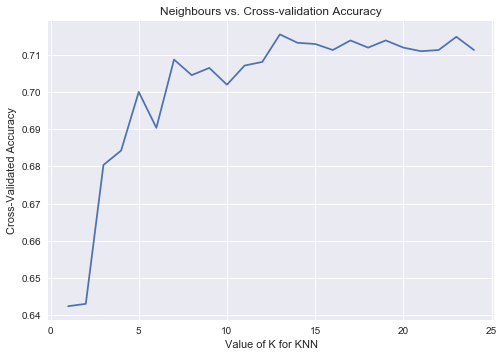

Wall time: 24.3 s


In [54]:
%%time
# Constructing a graph for above
k_range = range(1, 25)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform') # Runs KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy') # Obtains CV scores for above
    k_scores.append(scores.mean()) # Appends mean of scores for k neighbors to k_scores list
    
# Plots value of K for KNN vs. CV accuracy
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Neighbours vs. Cross-validation Accuracy')
plt.show()

We can see that increasing number of neighbours improves accuracy. However, we need to be wary of this as eventually accuracy tapers, and also subject to overfitting. The best performing k seems to be 13 neighbours, marginally outperforming k=23.

### Decision Tree

In [55]:
%%time
# Setup the parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

# Cross-validate with three loss functions, then store into list
for score, model_list, name in zip(scores_metric, comb_models, scores_name):
    tree = DecisionTreeClassifier() # Decision Tree classifier
    tree_cv = RandomizedSearchCV(tree,param_dist, cv=10, scoring=score, n_iter=10, random_state=5) # RandomizedSearchCV object
    treeopt = tree_cv.fit(x_train, y_train)
    treeopt = treeopt.fit(x_train, y_train)
    model_names.append('Decision Tree {}'.format(name))
    model_list.append(treeopt)

Wall time: 6.24 s


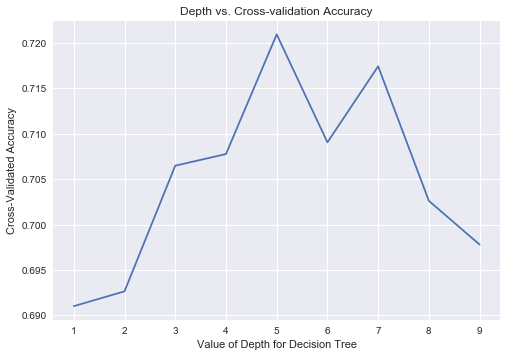

Wall time: 944 ms


In [56]:
%%time
# Constructing a graph for above
tree_range = range(1, 10)
t_scores = []
for k in tree_range:
    tree = DecisionTreeClassifier(max_depth=k, criterion='entropy', max_features=8, max_leaf_nodes=None) # Runs Decision Tree with depth values of tree
    scores = cross_val_score(tree, x_train, y_train, cv=10, scoring='accuracy') # Obtain CV score for above
    t_scores.append(scores.mean()) # Appends mean of scores for decision tree to t-score list
    
# Plots value of Depth for Decision Tree vs. CV accuracy
plt.plot(tree_range, t_scores)
plt.xlabel('Value of Depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Depth vs. Cross-validation Accuracy')
plt.show()

After peaking at a decision tree depth of 5, the performance deteriorates fairly rapidly.

### Random Forest

In [57]:
%%time
# Setup the parameters and distributions to sample from
param_dist = {"n_estimators": range(5,15),
              "max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_split": range(2,5),
              "min_samples_leaf": range(1, 9)}

# Cross-validate with three loss functions, then store into list
for score, model_list, name in zip(scores_metric, comb_models, scores_name):
    randFor = RandomForestClassifier() # Extremely Random Forest classifier
    randFor_cv = RandomizedSearchCV(randFor,param_dist, cv=10, scoring=score, n_iter=10, random_state=5) # RandomizedSearchCV object
    optrand = randFor_cv.fit(x_train, y_train)
    optrand = optrand.fit(x_train, y_train)
    model_names.append('Random Forest {}'.format(name))
    model_list.append(optrand)

Wall time: 24.3 s


### Logistic Regression

In [58]:
%%time
from sklearn.linear_model import LogisticRegressionCV

# Logistic regression, cross-validated for three models against three loss functions
# Logit model
for score, model_list, name in zip(scores_metric, comb_models, scores_name):
    logit = LogisticRegressionCV(cv=10, scoring=score)
    logit = logit.fit(x_train, y_train)
    model_names.append('Logit {}'.format(name))
    model_list.append(logit)

# Logit model with l1 penalty    
for score, model_list, name in zip(scores_metric, comb_models, scores_name):
    logit_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=10, scoring=score)
    logit_l1 = logit_l1.fit(x_train, y_train)
    model_names.append('Logit L1 {}'.format(name))
    model_list.append(logit_l1)
    
# Logit model with l2 penalty
for score, model_list, name in zip(scores_metric, comb_models, scores_name):
    logit_l2 = LogisticRegressionCV(penalty='l2', solver='liblinear', cv=10, scoring=score)
    logit_l2 = logit_l2.fit(x_train, y_train)
    model_names.append('Logit L2 {}'.format(name))
    model_list.append(logit_l2)

Wall time: 40.6 s


#### Models which do not need tuning

In [59]:
%%time
# Naive Bayes
NaiveB = GaussianNB()
optnb = NaiveB.fit(x_train, y_train)
models.append(optnb)
model_names.append('Naive Bayes')

# Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
optlda = LDA.fit(x_train, y_train)
models.append(optlda)
model_names.append('LDA')

# Quadratic Discriminant Analysis
QDA = QuadraticDiscriminantAnalysis()
optqda = QDA.fit(x_train, y_train)
models.append(optqda)
model_names.append('QDA')

Wall time: 28.1 ms


<a class="anchor" id="eval"></a>
# Evaluation
** (Assessment and evaluation of models) **

We can assess/evaluate how each of our model performs using the confusion matricies of the classifications.

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

def get_Result_Table(labels, models, model_scorer, x, y):
    '''Generates a table depending on which models we are assessing, based on the scorer.
    The final two arguments indicate the data used for assessment/evaluation'''
    
    # Retrieves model we want to analyse based on the scorer used
    names = []
    if model_scorer == 'accuracy':
        names = labels[0:17:3] + labels[18:21]
    elif model_scorer == 'TP_score':
        names = labels[1:17:3]
    elif model_scorer == 'TN_score':
        names = labels[2:18:3]
    else:
        print('Wrong model_scorer argument')
        
    # Create dataframe to store results
    columns = ['Overall Accuracy', 'Error Rate', 'SE',
               'Sensitivity/TP (Recall)', 'Positive Predictive Value (Precision)',
               'Specificity/TN', 'Negative Predictive Value', 'F1 Score',
               'Profit', 'Profit per Customer', 'Upper CI', 'Lower CI']
    results = pd.DataFrame(0.0, columns=columns, index=names)
    
    # Iterate through and compute predictions for models we are looking at
    predictions = []
    for clf in models:
        pred = clf.predict(x)
        predictions.append(pred)
        
    for row, pred in zip(range(0,len(names)), predictions):
        # Calculates the confusion matrix and appends each value to an interpretable variable
        matrix = confusion_matrix(y, pred)
        tn = matrix[0][0]
        fp = matrix[0][1]
        fn = matrix[1][0]
        tp = matrix[1][1]
        
        # Calculates accuracy metrics
        accuracy = (accuracy_score(y, pred))
        error_rate = 1-accuracy
        se = np.sqrt(error_rate*(1-error_rate)/len(y))
        
        # Appends all metrics to the table
        results.iloc[row,0] = accuracy
        results.iloc[row,1] = error_rate
        results.iloc[row,2] = se
        results.iloc[row,3] = tp/(tp+fn) # sensitivity
        results.iloc[row,4] = tp/(tp+fp) # pos pred value
        results.iloc[row,5] = tn/(tn+fp) # specificity
        results.iloc[row,6] = tn/(tn+fn) # neg pred value
        results.iloc[row,7] = f1_score(y, pred)
        results.iloc[row,8] = (11.5*tp)-(14*fn)-(2.5*fp) # total profit
        results.iloc[row,9] = ((11.5*tp)-(14*fn)-(2.5*fp))/y.shape[0] # profit per customer
        results.iloc[row,10] = (((11.5*tp)-(14*fn)-(2.5*fp))/y.shape[0]) + (1.96*se) # upper 95% CI
        results.iloc[row,11] = (((11.5*tp)-(14*fn)-(2.5*fp))/y.shape[0]) - (1.96*se) # lower 95% CI
    
    return results.round(3)

In [61]:
# NB: This function is no longer used
def getResultTable_old(rows, predictions):
    '''Generates a table highlighting the results of each model.'''
    columns=['Accuracy for No', 'Accuracy for Yes', 'Overall Accuracy']
    results=pd.DataFrame(0.0, columns=columns, index=rows)
    for row,pred in zip(range(0,len(rows)),predictions):
        matrix = confusion_matrix(y_test, pred)
        results.iloc[row,0] = (matrix[0][0]/(matrix[0][0]+matrix[1][0]))
        results.iloc[row,1] = (matrix[1][1]/(matrix[0][1]+matrix[1][1]))
        results.iloc[row,2] = (accuracy_score(y_test, pred))
    return results.round(3)

** Results for models based on best accuracy during cross-validation. **

In [62]:
get_Result_Table(model_names, models, 'accuracy', x_val, y_val)

,Overall Accuracy,Error Rate,SE,Sensitivity/TP (Recall),Positive Predictive Value (Precision),Specificity/TN,Negative Predictive Value,F1 Score,Profit,Profit per Customer,Upper CI,Lower CI
KNN Accuracy,0.723,0.277,0.006,0.720,0.336,0.724,0.930,0.459,810.5,0.133,0.144,0.122
Decision Tree Accuracy,0.748,0.252,0.006,0.671,0.355,0.763,0.923,0.464,61.0,0.010,0.021,-0.001
Random Forest Accuracy,0.750,0.250,0.006,0.734,0.366,0.753,0.936,0.488,1514.5,0.249,0.260,0.238
Logit Accuracy,0.759,0.241,0.005,0.790,0.384,0.753,0.949,0.517,2950.0,0.485,0.495,0.474
Logit L1 Accuracy,0.759,0.241,0.005,0.793,0.384,0.753,0.949,0.518,3021.5,0.496,0.507,0.486
Logit L2 Accuracy,0.760,0.240,0.005,0.790,0.385,0.755,0.949,0.518,2965.0,0.487,0.498,0.476
Naive Bayes,0.818,0.182,0.005,0.555,0.452,0.869,0.909,0.498,-1516.5,-0.249,-0.239,-0.259
LDA,0.749,0.251,0.006,0.803,0.374,0.738,0.951,0.510,3089.0,0.507,0.518,0.497
QDA,0.809,0.191,0.005,0.562,0.433,0.857,0.910,0.489,-1490.5,-0.245,-0.235,-0.255


** Results for models based on highest true-positives rate during cross-validation. **

In [63]:
get_Result_Table(model_names, models_tp, 'TP_score', x_val, y_val).sort_values(by='Profit')

,Overall Accuracy,Error Rate,SE,Sensitivity/TP (Recall),Positive Predictive Value (Precision),Specificity/TN,Negative Predictive Value,F1 Score,Profit,Profit per Customer,Upper CI,Lower CI
KNN TP_score,0.723,0.277,0.006,0.720,0.336,0.724,0.930,0.459,810.5,0.133,0.144,0.122
Decision Tree TP_score,0.739,0.261,0.006,0.725,0.353,0.741,0.933,0.474,1140.0,0.187,0.198,0.176
Random Forest TP_score,0.745,0.255,0.006,0.742,0.361,0.745,0.937,0.486,1621.0,0.266,0.277,0.255
Logit TP_score,0.759,0.241,0.005,0.790,0.384,0.753,0.949,0.517,2950.0,0.485,0.495,0.474
Logit L1 TP_score,0.700,0.300,0.006,0.862,0.336,0.669,0.961,0.483,3680.5,0.605,0.616,0.593
Logit L2 TP_score,0.760,0.240,0.005,0.790,0.384,0.754,0.949,0.517,2957.5,0.486,0.497,0.475


** Results for models based on highest true-negative rate during cross-validation. **

In [64]:
import warnings
warnings.filterwarnings('ignore')
get_Result_Table(model_names, models_tn, 'TN_score', x_val, y_val)

,Overall Accuracy,Error Rate,SE,Sensitivity/TP (Recall),Positive Predictive Value (Precision),Specificity/TN,Negative Predictive Value,F1 Score,Profit,Profit per Customer,Upper CI,Lower CI
KNN TN_score,0.769,0.231,0.005,0.472,0.346,0.826,0.889,0.399,-4155.0,-0.683,-0.672,-0.693
Decision Tree TN_score,0.688,0.312,0.006,0.737,0.309,0.679,0.930,0.435,651.0,0.107,0.119,0.095
Random Forest TN_score,0.767,0.233,0.005,0.704,0.383,0.779,0.931,0.496,1115.0,0.183,0.194,0.173
Logit TN_score,0.782,0.218,0.005,0.645,0.396,0.809,0.921,0.491,-14.5,-0.002,0.008,-0.013
Logit L1 TN_score,0.837,0.163,0.005,0.000,NaN,1.000,0.837,0.000,-13874.0,-2.279,-2.270,-2.289
Logit L2 TN_score,0.760,0.240,0.005,0.790,0.385,0.755,0.949,0.518,2965.0,0.487,0.498,0.476


** Findings **

Top two models (based on profit):
* Logit L1 (TP) - 0.605 per customer
* LDA (Accuracy) - 0.507 per customer

Runner ups:
* Logit L1 (Accuracy) - 0.496
* Logit L2 (Accuracy/TN) - 0.487
* Logit L2 (TP) - 0.486
* Logit (Accuracy/TP) - 0.485
* Random Forest (Accuracy) - 0.249

Amongst the runner ups, logit functions all performed very well - with not much variation in expected profits. However, after logistic, the next best was a big reduction in profit per customer, with Random Forest

Why?
* By having high TP and high TN, we maximise our profit from respondends, and minimise our costs from misclassifying and sending to those who will not respond
* Accuracy combines sensitivity and recall, so naturally will be high performing - though not necessarily return the highest profit due to imbalances in cost/benefit (as per below)
* As for the consistent high performance of the logit models, this may be due to the power of the sigmoid activation?

Costs (recap):
* TN: 0
* TP: 11.50
* FN -14
* FP: -2.50

<a class="anchor" id="deploy"></a>
# Deployment
Final classification of best models on unseen test dataset, before full roll out.

In [65]:
get_Result_Table(model_names, models_tp, 'TP_score', x_test, y_test).iloc[[4]]

,Overall Accuracy,Error Rate,SE,Sensitivity/TP (Recall),Positive Predictive Value (Precision),Specificity/TN,Negative Predictive Value,F1 Score,Profit,Profit per Customer,Upper CI,Lower CI
Logit L1 TP_score,0.692,0.308,0.006,0.822,0.328,0.666,0.95,0.469,2974.0,0.456,0.467,0.445


In [66]:
get_Result_Table(model_names, models, 'accuracy', x_test, y_test).iloc[[7]]

,Overall Accuracy,Error Rate,SE,Sensitivity/TP (Recall),Positive Predictive Value (Precision),Specificity/TN,Negative Predictive Value,F1 Score,Profit,Profit per Customer,Upper CI,Lower CI
LDA,0.747,0.253,0.005,0.776,0.373,0.742,0.943,0.504,2734.0,0.419,0.43,0.409


** Findings **

Logit L1 and LDA maintain their ranks as #1 and #2, greatly outperforming the next best models on the test data. As a result, these models both return positive and high profits per customer.

These models are ready for deployment!!!